In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Diccionario con los dias

In [2]:
dict_days = dict(zip(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], 
                     ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                    ))

## Importando la data de volumenes por dia

In [3]:
# Volumes per day
df_day = pd.read_csv('volumes per day.csv', index_col=0)
# Weeks
LIST_WEEKS = df_day['WEEK'].unique()
df_day.head(30)

,DATE,WEEK,DAY,ORDERS,LINES,PCS,SKU,CITIES
0,2017-01-02,WEEK-1,MON,776,1367,1595.0,487,174
1,2017-01-03,WEEK-1,TUE,902,1550,1861.0,547,188
2,2017-01-04,WEEK-1,WED,1476,2252,2856.0,513,205
3,2017-01-05,WEEK-1,THU,909,1637,1972.0,519,175
4,2017-01-06,WEEK-1,FRI,1023,1720,1995.0,502,189
5,2017-01-07,WEEK-1,SAT,1021,2578,2953.0,544,203
6,2017-01-08,WEEK-1,SUN,1797,3479,4188.0,636,276
7,2017-01-09,WEEK-2,MON,1453,2827,3442.0,666,251
8,2017-01-10,WEEK-2,TUE,1469,2694,3062.0,619,250
9,2017-01-11,WEEK-2,WED,1921,3067,3591.0,616,279


In [4]:
def analysis_week(df_day, WEEK):
    
    # Filter Scope
    df_plot = df_day[df_day['WEEK'] ==WEEK].copy()

    ''' Calculate KPIs for Comments'''
    # Lines per orders
    df_plot['LINES/ORDER'] = df_plot['LINES']/df_plot['ORDERS']
    avg_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].mean())
    max_ratio = '{:.2f} lines/order'.format(df_plot['LINES/ORDER'].max())

    # Maximum Day Lines
    busy_day = dict_days[df_plot.set_index('DAY')['LINES'].idxmax()]
    max_lines = '{:,} lines'.format(df_plot['LINES'].max())

    # Total Workload
    total_lines = '{:,} lines'.format(df_plot['LINES'].sum())

    # Bar Plot: Orders/Lines
    fig, ax = plt.subplots(figsize=(12, 6))
    df_plot.plot.bar(figsize=(8, 6), edgecolor='black', x='DAY', y=['ORDERS', 'LINES'], 
                     color=['tab:blue', 'tab:orange'], legend= True, ax = ax)
    plt.xlabel('DAY', fontsize = 12)
    plt.title('Workload per day (Lines/day)', fontsize = 12)
#     plt.show()

    # Save plot
    filename = WEEK + ".png"
    path_plot = "img/" + filename
    fig.savefig(path_plot, dpi=fig.dpi)
    
    return avg_ratio, max_ratio, busy_day, max_lines, total_lines

## Importando la data de lineas por dia 

In [5]:
# Lines per day
df_lior = pd.read_csv('lines per day.csv', index_col=0)
COLS_IN = list(df_lior.columns[0:8])
df_lior.reset_index(inplace = True)
df_lior.head()

,WEEK,1,2,3,4,5,+
0,WEEK-1,5178,1265,501,304,162,494
1,WEEK-2,5930,1832,756,423,211,640
2,WEEK-3,5047,1490,717,360,176,550
3,WEEK-4,2681,753,283,190,105,301
4,WEEK-5,966,271,95,78,30,85


In [6]:
def plot_split(df_lior):
    
    # Bar Plot: split per lines per orders
    fig, ax = plt.subplots(figsize=(12, 6))
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[0], color='tab:blue', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[1], color='tab:red', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[2], color='tab:orange', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[3], color='darkblue', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[4], color='brown', legend= True, ax = ax)
    df_lior.plot.bar(figsize=(10, 6), edgecolor='black', x='WEEK', y=COLS_IN[5], color='grey', legend= True, ax = ax)
    plt.xlabel('Week', fontsize = 14)
    plt.ylabel('Number of Orders', fontsize = 14)
    plt.title('Split of orders by number of lines/order', fontsize = 14)
#     plt.show()

    # Save plot
    filename = 'SPLIT' + ".png"
    path_plot = "img/" + filename
    fig.savefig(path_plot, dpi=fig.dpi)

    # Analysis
    orders = df_lior.sum(axis = 1).sum()
    total_orders = '{:,} orders'.format(orders)
    
    # Split full month
    df_an = pd.DataFrame(100 * df_lior.set_index('WEEK').sum(axis = 0)/orders)
    df_an.columns = ['%']
    LIST_ANALYSIS = []
    for l in df_an.index[0:3]:
        LIST_ANALYSIS.append('{}% of orders with {} line(s) per order'.format(df_an.loc[l, '%'].round(1), l))
        
        
    return total_orders, LIST_ANALYSIS

## Creando el ppt

In [7]:
import aspose.slides as slides
import aspose.pydrawing as draw

C:\Users\kevin\AppData\Local\Temp\ipykernel_4904\3788942079.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  orders = df_lior.sum(axis = 1).sum()


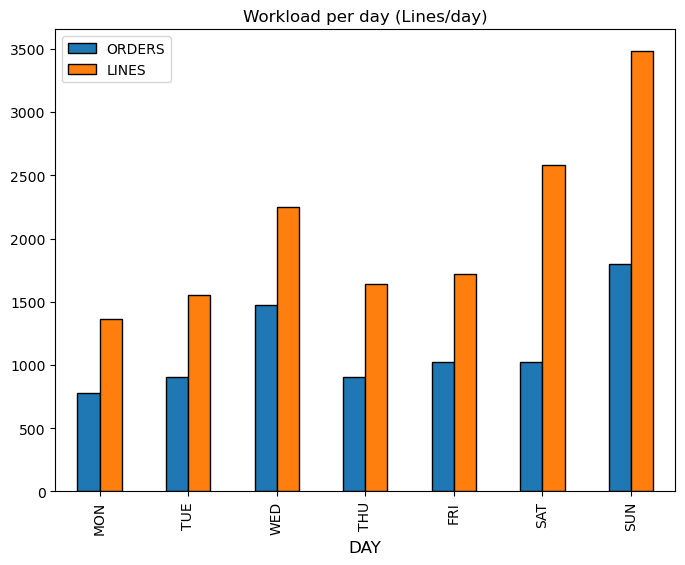

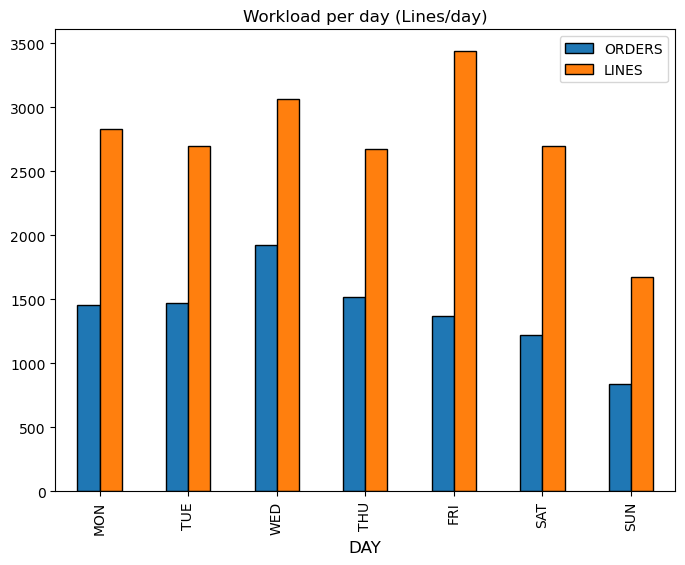

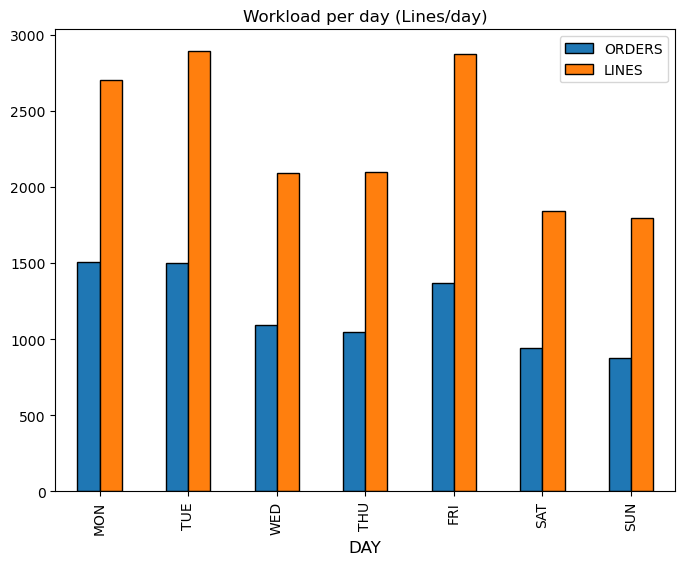

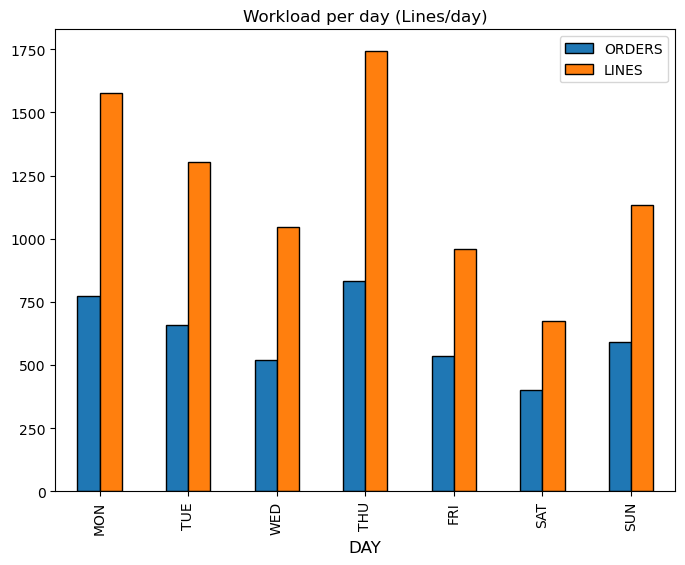

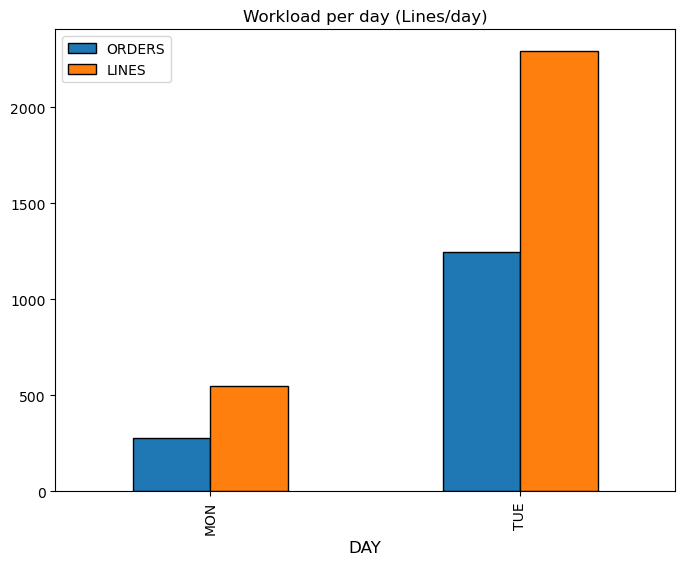

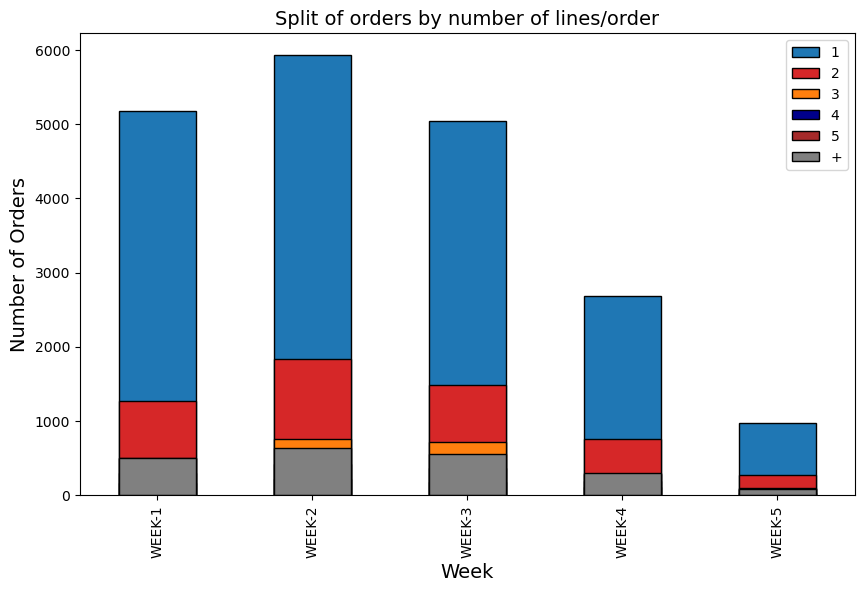

In [17]:
with slides.Presentation() as presentation:
    masterSlide = presentation.masters[0]
    presentation.slides.remove(presentation.slides[0])  
    page = 0
    
    # Slide Introduction
    
    slide = presentation.slides.add_empty_slide(masterSlide.layout_slides[5])
    slide.background.type = slides.BackgroundType.OWN_BACKGROUND
    slide.background.fill_format.fill_type = slides.FillType.PICTURE
    slide.background.fill_format.picture_fill_format.picture_fill_mode = slides.PictureFillMode.STRETCH
    img = draw.Bitmap("img/bodega.jpg")
    imgx = presentation.images.add_image(img)
    slide.background.fill_format.picture_fill_format.picture.image = imgx
    
    
    for shape in slide.slide.shapes: # Iterates through the slide
        if shape.placeholder != None and shape.placeholder.type == slides.PlaceholderType.TITLE:
            title = 'Warehouse Analysis'
            shape.text_frame.text = title
            shape.x = 50
            shape.y = 150
            shape.fill_format.fill_type = slides.FillType.GRADIENT
            shape.fill_format.gradient_format.gradient_shape = slides.GradientShape.RADIAL
            shape.fill_format.gradient_format.gradient_direction = slides.GradientDirection.FROM_CENTER
            shape.fill_format.gradient_format.gradient_stops.add(1.0, slides.SchemeColor.LIGHT2)
            shape.fill_format.gradient_format.gradient_stops.add(0, slides.PresetColor.GRAY)
            
    ashp = slide.shapes.add_auto_shape(slides.ShapeType.ROUND_CORNER_RECTANGLE, 200, 255, 300, 50)
    ashp.add_text_frame(" ")
    txtFrame = ashp.text_frame
    para = txtFrame.paragraphs[0]
    portion = para.portions[0]
    portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
    portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
    portion.text = 'Orders/day for the last {} weeks'.format(len(LIST_WEEKS))
    
    ashp.line_format.fill_format.fill_type = slides.FillType.SOLID
    ashp.line_format.fill_format.solid_fill_color.color = draw.Color.black
    ashp.fill_format.fill_type = slides.FillType.GRADIENT
    ashp.fill_format.gradient_format.gradient_shape = slides.GradientShape.RADIAL
    ashp.fill_format.gradient_format.gradient_direction = slides.GradientDirection.FROM_CENTER
    ashp.fill_format.gradient_format.gradient_stops.add(1.0, slides.SchemeColor.LIGHT2)
    ashp.fill_format.gradient_format.gradient_stops.add(0, slides.PresetColor.GRAY)
    
    
    # Slides Analysis per Week
    for WEEK in LIST_WEEKS:
        avg_ratio, max_ratio, busy_day, max_lines, total_lines = analysis_week(df_day, WEEK)
        slide = presentation.slides.add_empty_slide(masterSlide.layout_slides[5])
        
        for shape in slide.slide.shapes: # Iterates through the slide
            if shape.placeholder != None and shape.placeholder.type == slides.PlaceholderType.TITLE:
                title = 'Warehouse Workload ({})'.format(WEEK)
                shape.text_frame.text = title
        
        with open('img/{}.png'.format(WEEK), "rb") as in_file:
            image = presentation.images.add_image(in_file)
            imgshp = slide.shapes.add_picture_frame(slides.ShapeType.RECTANGLE, 130, 90, 450, 320, image)
            slide.shapes.reorder(0, imgshp)
            
            
        ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 30, 400, 90, 30)
        ashp.add_text_frame(" ")
        txtFrame = ashp.text_frame
        para = txtFrame.paragraphs[0]
        portion = para.portions[0]
        portion.text = "Analysis"
        portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
        portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
        
        ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 50, 430, 550, 30)
        ashp.add_text_frame(" ")
        txtFrame = ashp.text_frame
        para = txtFrame.paragraphs[0]
        para.paragraph_format.alignment = slides.TextAlignment.LEFT
        portion = para.portions[0]
        portion.text = '• {} have been prepared during the week'.format(total_lines)
        portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
        portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
        
        ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 50, 460, 550, 30)
        ashp.add_text_frame(" ")
        txtFrame = ashp.text_frame
        para = txtFrame.paragraphs[0]
        para.paragraph_format.alignment = slides.TextAlignment.LEFT
        portion = para.portions[0]
        portion.text = '• {} has been the busiest day with {} prepared'.format(busy_day, max_lines)
        portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
        portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
        
        ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 50, 490, 550, 30)
        ashp.add_text_frame(" ")
        txtFrame = ashp.text_frame
        para = txtFrame.paragraphs[0]
        para.paragraph_format.alignment = slides.TextAlignment.LEFT
        portion = para.portions[0]
        portion.text = '• {} on average with a maximum of {}'.format(avg_ratio, max_ratio)
        portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
        portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
        
        ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 650, 500, 50, 30)
        ashp.add_text_frame(" ")
        txtFrame = ashp.text_frame
        para = txtFrame.paragraphs[0]
        para.paragraph_format.alignment = slides.TextAlignment.LEFT
        portion = para.portions[0]
        portion.text = str('{}/{}'.format(page+1, len(LIST_WEEKS) + 1 ))
        portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
        portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
        
        page = page+1
        
    # Slides Weekly Analysis of Order Profile
    
    total_orders, LIST_ANALYSIS = plot_split(df_lior)
    slide = presentation.slides.add_empty_slide(masterSlide.layout_slides[5])
    for shape in slide.slide.shapes: # Iterates through the slide
        if shape.placeholder != None and shape.placeholder.type == slides.PlaceholderType.TITLE:
            title = 'Order Profile'
            shape.text_frame.text = title
            
    with open('img/{}.png'.format('SPLIT'), "rb") as in_file:
        image = presentation.images.add_image(in_file)
        imgshp = slide.shapes.add_picture_frame(slides.ShapeType.RECTANGLE, 130, 80, 450, 320, image)
        slide.shapes.reorder(0, imgshp)
    
    ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 30, 410, 210, 30)
    ashp.add_text_frame(" ")
    txtFrame = ashp.text_frame
    para = txtFrame.paragraphs[0]
    para.paragraph_format.alignment = slides.TextAlignment.LEFT
    portion = para.portions[0]
    portion.text = '{} prepared'.format(total_orders)
    portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
    portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
    
    y = 420
    
    for l in LIST_ANALYSIS:
        y = y + 20
        ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 30, y, 500, 30)
        ashp.add_text_frame(" ")
        txtFrame = ashp.text_frame
        para = txtFrame.paragraphs[0]
        para.paragraph_format.alignment = slides.TextAlignment.LEFT
        portion = para.portions[0]
        portion.text = '{} prepared'.format(l)
        portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
        portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
        
        ashp = slide.shapes.add_auto_shape(slides.ShapeType.NOT_DEFINED, 650, 500, 50, 30)
        ashp.add_text_frame(" ")
        txtFrame = ashp.text_frame
        para = txtFrame.paragraphs[0]
        para.paragraph_format.alignment = slides.TextAlignment.LEFT
        portion = para.portions[0]
        portion.text = str('{}/{}'.format(page+1, len(LIST_WEEKS) + 1 ))
        portion.portion_format.fill_format.fill_type = slides.FillType.SOLID
        portion.portion_format.fill_format.solid_fill_color.color = draw.Color.black
    
    
    presentation.save("automated-ppt.pptx", slides.export.SaveFormat.PPTX)